<a href="https://colab.research.google.com/github/GenAIUnplugged/machine-learning/blob/main/heart_disease_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 28.3MB/s]


In [7]:
!unzip heart-disease-dataset.zip -d heart-disease-dataset

Archive:  heart-disease-dataset.zip
  inflating: heart-disease-dataset/heart.csv  


In [8]:
data_dir = "/content/heart-disease-dataset"

In [9]:
import os
df = pd.read_csv(os.path.join(data_dir,"heart.csv"))

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
descriptive_stats = df.describe().T
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [15]:
df.shape

(1025, 14)

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


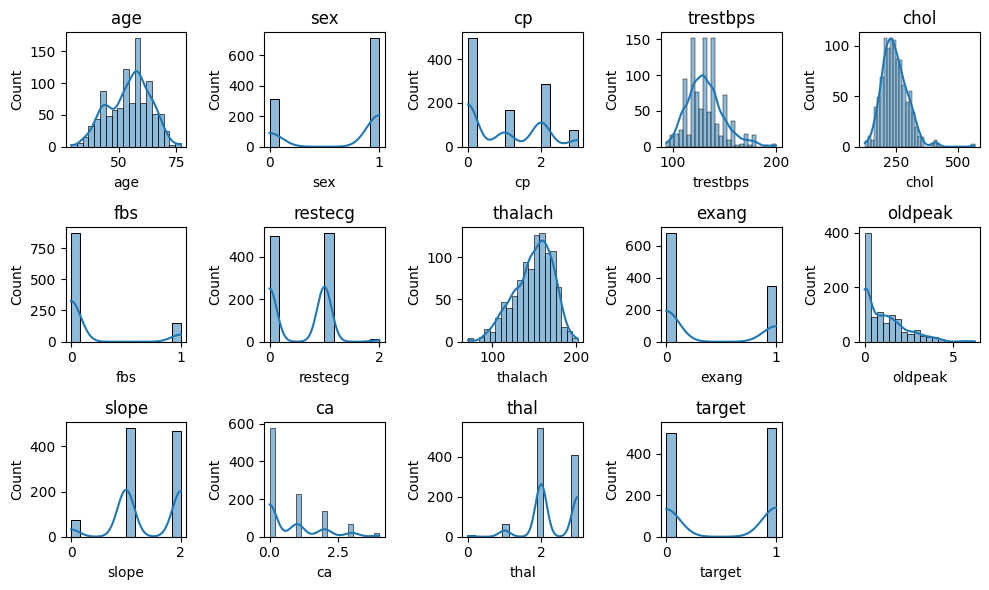

In [23]:
import math
plt.figure(figsize=(10, 6))
for col in df.columns:
  plt.subplot(3,math.ceil(len(df.columns)/3),df.columns.get_loc(col)+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

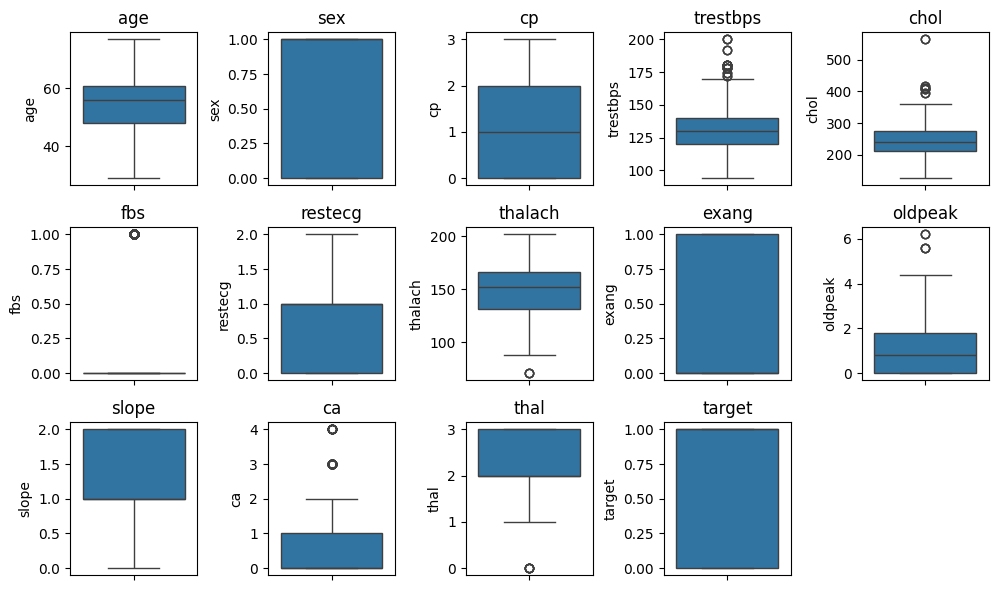

In [25]:
import math
plt.figure(figsize=(10, 6))
for col in df.columns:
  plt.subplot(3,math.ceil(len(df.columns)/3),df.columns.get_loc(col)+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

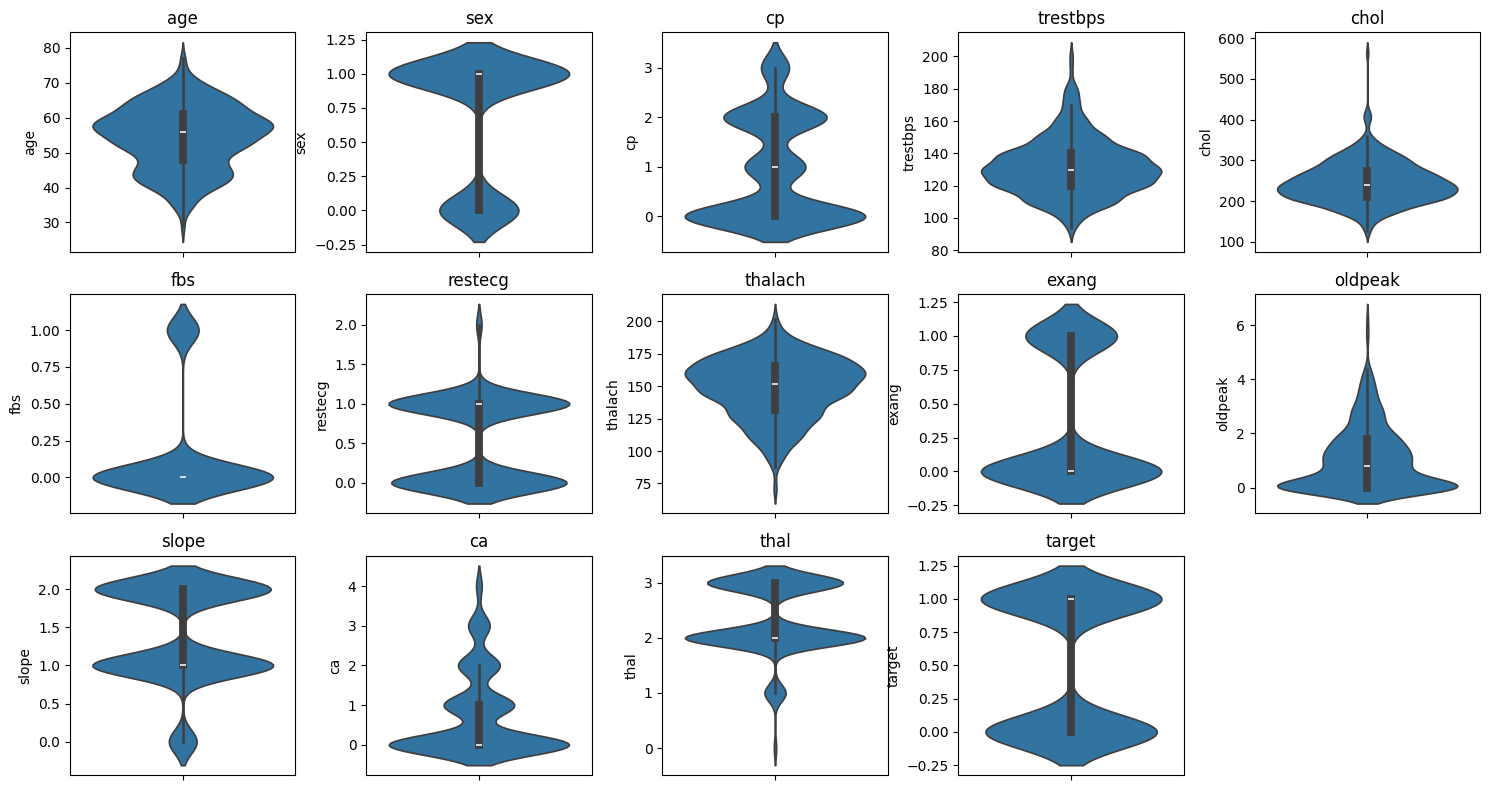

In [28]:
import math
plt.figure(figsize=(15, 8))
for col in df.columns:
  plt.subplot(3,math.ceil(len(df.columns)/3),df.columns.get_loc(col)+1)
  sns.violinplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='chol'>

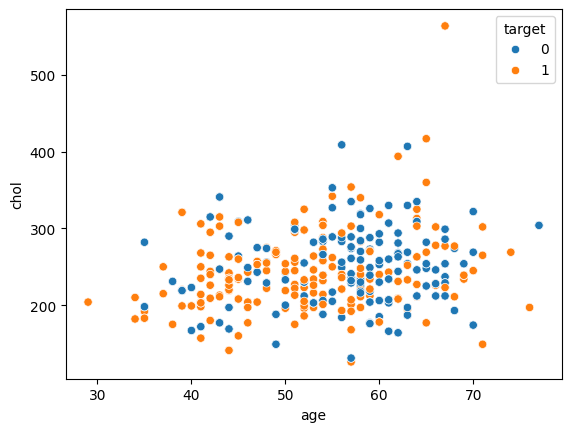

In [30]:
sns.scatterplot(data=df,x='age',y='chol',hue='target')

# Task
generate ML model for classification

Here is all the data you need:
"heart.csv"

## Data loading

### Subtask:
Load the heart disease dataset from the "heart.csv" file.


**Reasoning**:
Load the data from the "heart.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('heart.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'heart.csv' not found.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Could not parse 'heart.csv'. Please check file format.")
    df = None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


(1025, 14)


## Data exploration

### Subtask:
Explore the loaded heart disease dataset to understand its characteristics.


**Reasoning**:
Examine data types, descriptive statistics, missing values, and distributions of features; explore relationships between features and identify the target variable.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


ValueError: num must be an integer with 1 <= num <= 12, not 13

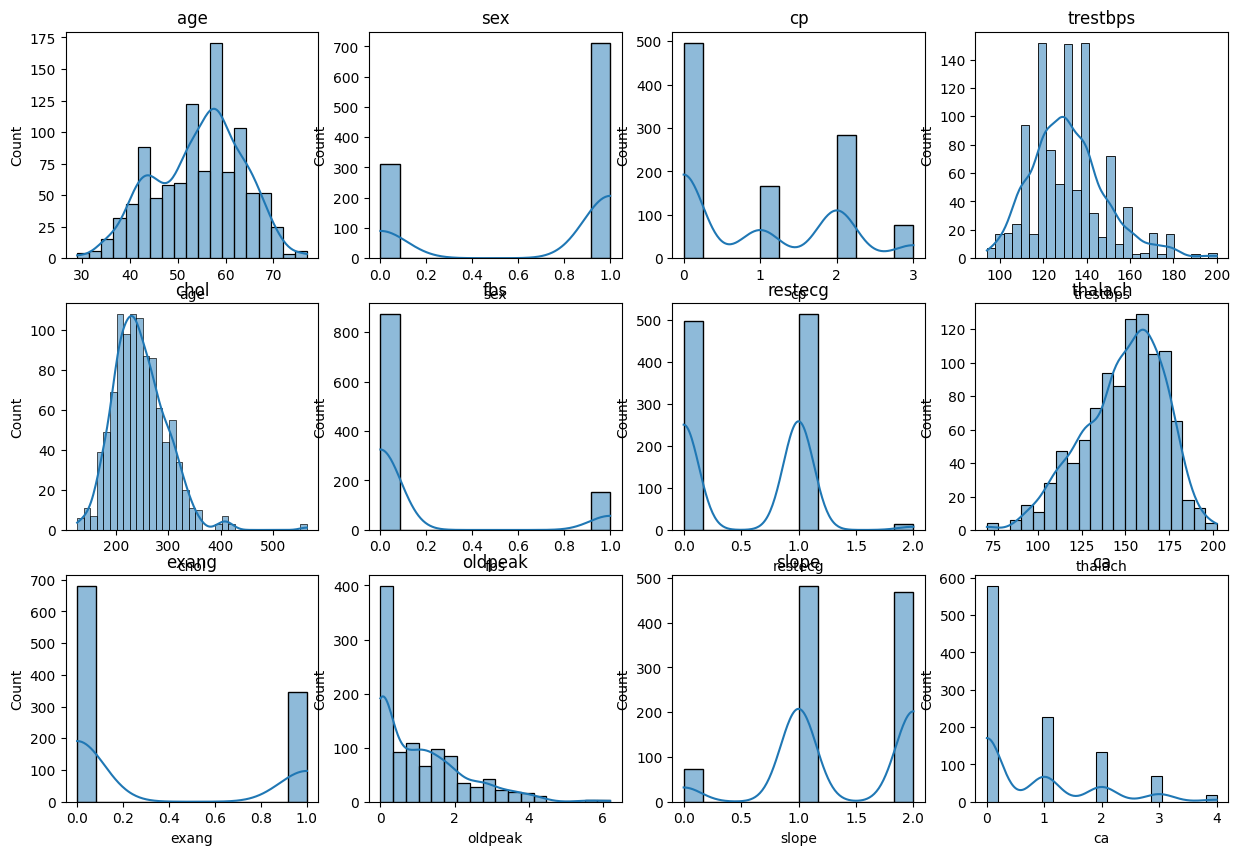

In [2]:
# Examine data types and descriptive statistics
display(df.info())
display(df.describe())

# Identify missing values
display(df.isnull().sum())

# Analyze the distribution of features and explore relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical features distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(exclude=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship between numerical features and target
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs. target')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Target variable analysis
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

**Reasoning**:
The previous code block failed due to an incorrect subplot specification.  I will correct the subplot grid and rerun the analysis.



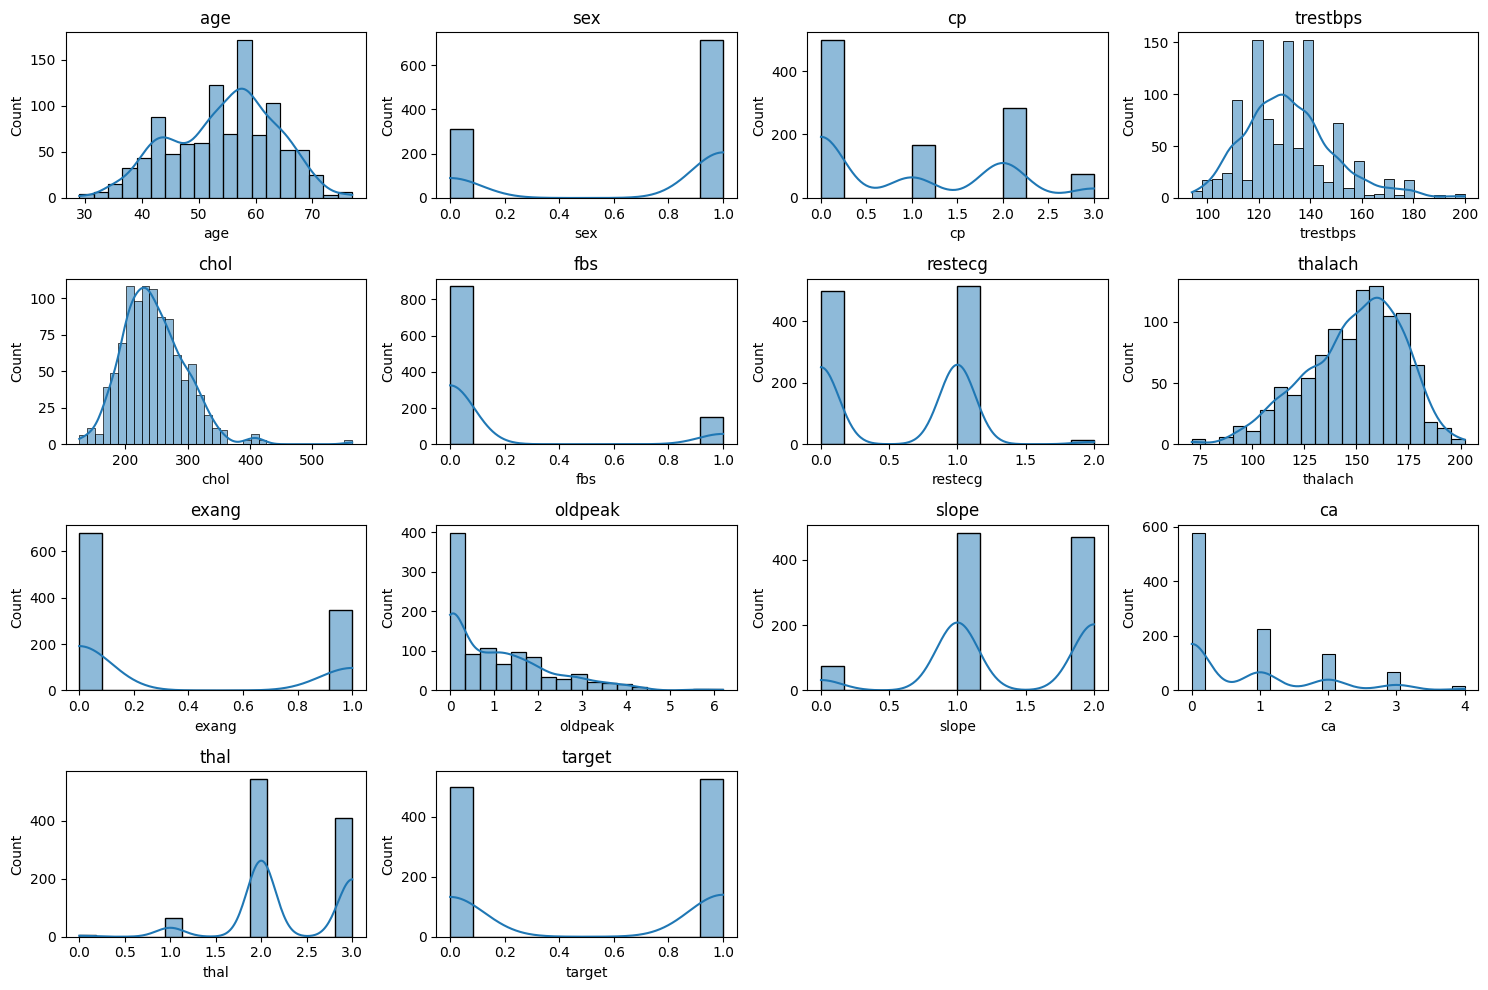

<Figure size 1500x1000 with 0 Axes>

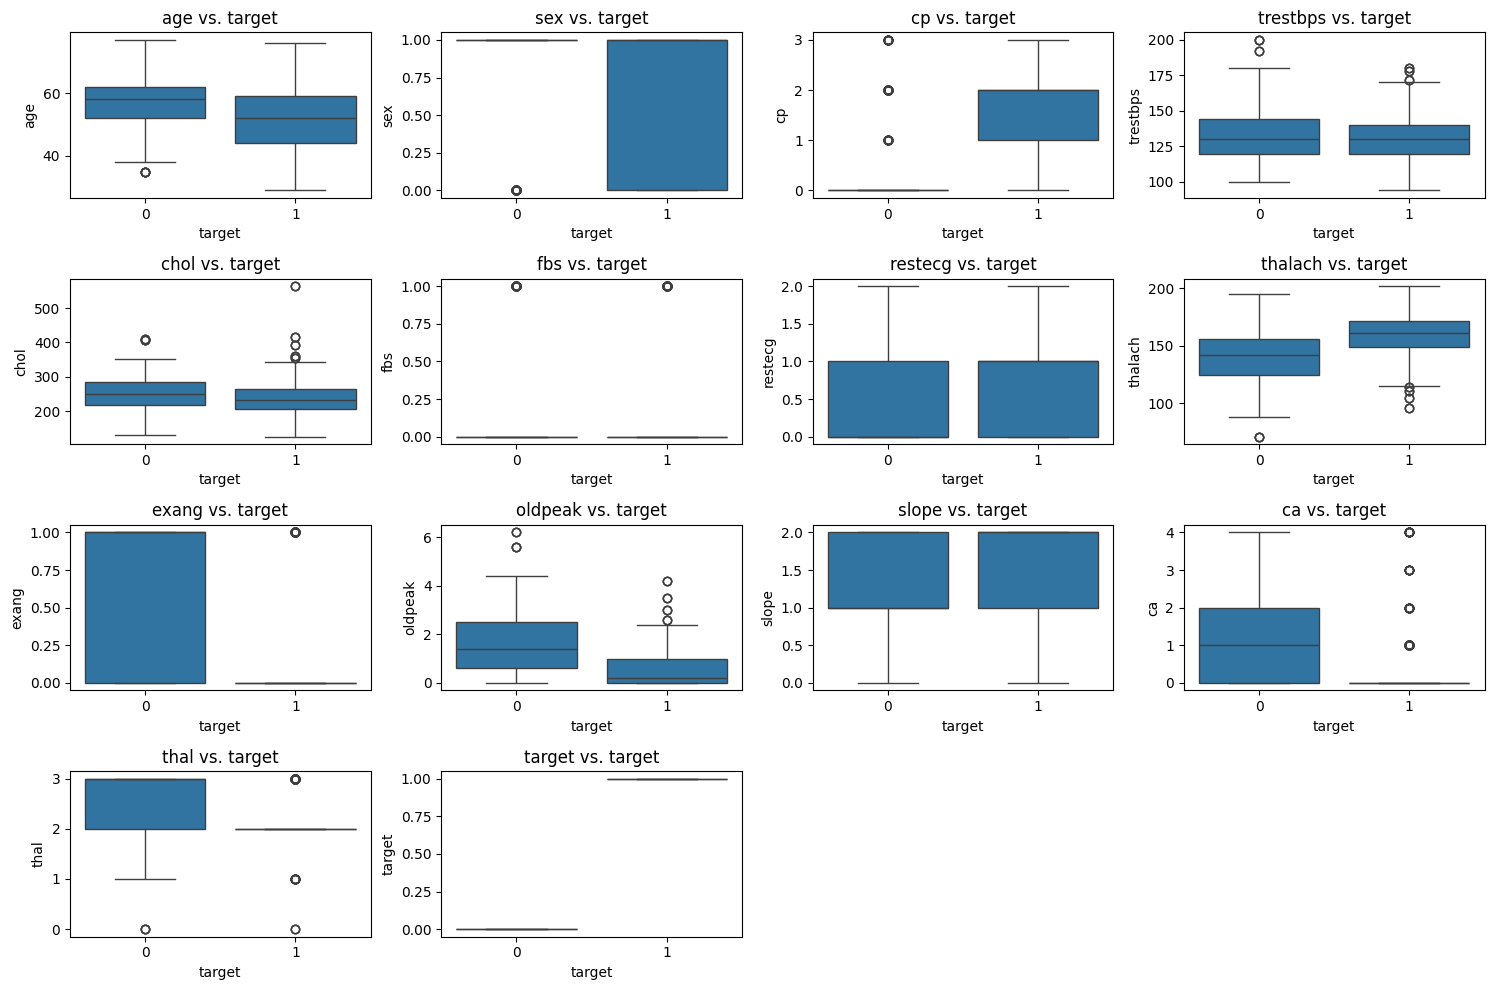

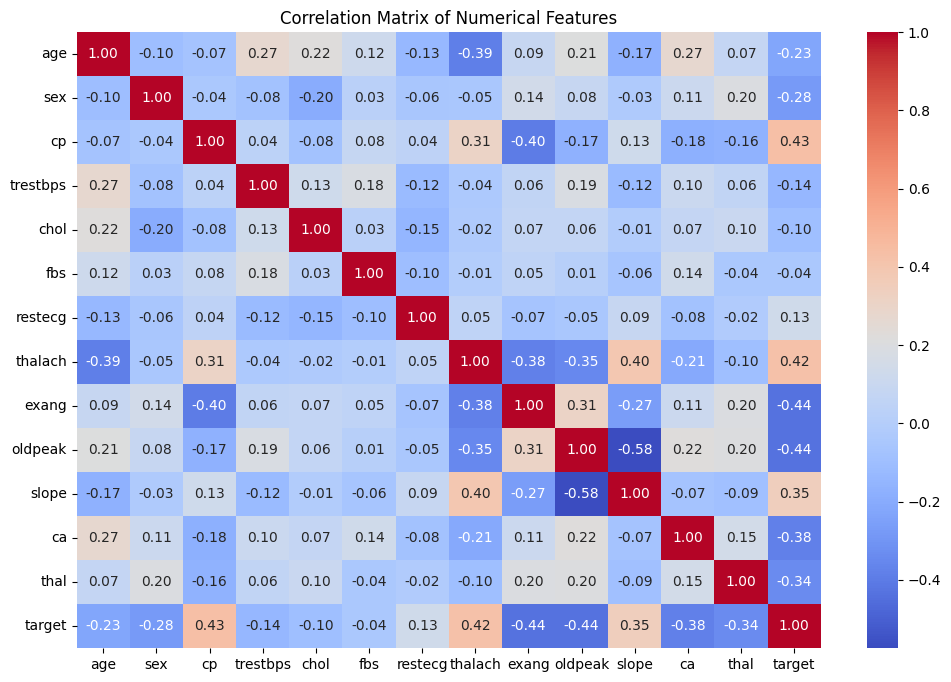

target
1    526
0    499
Name: count, dtype: int64
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [3]:
# Analyze the distribution of features and explore relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1) # Corrected subplot grid
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical features distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(exclude=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship between numerical features and target
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1) # Corrected subplot grid
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs. target')
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Target variable analysis
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Check for missing values and handle outliers in the dataframe.



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.260488   244.981463   
std       9.072290     0.460373     1.029641    16.532208    47.746162   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   170.000000   371.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025

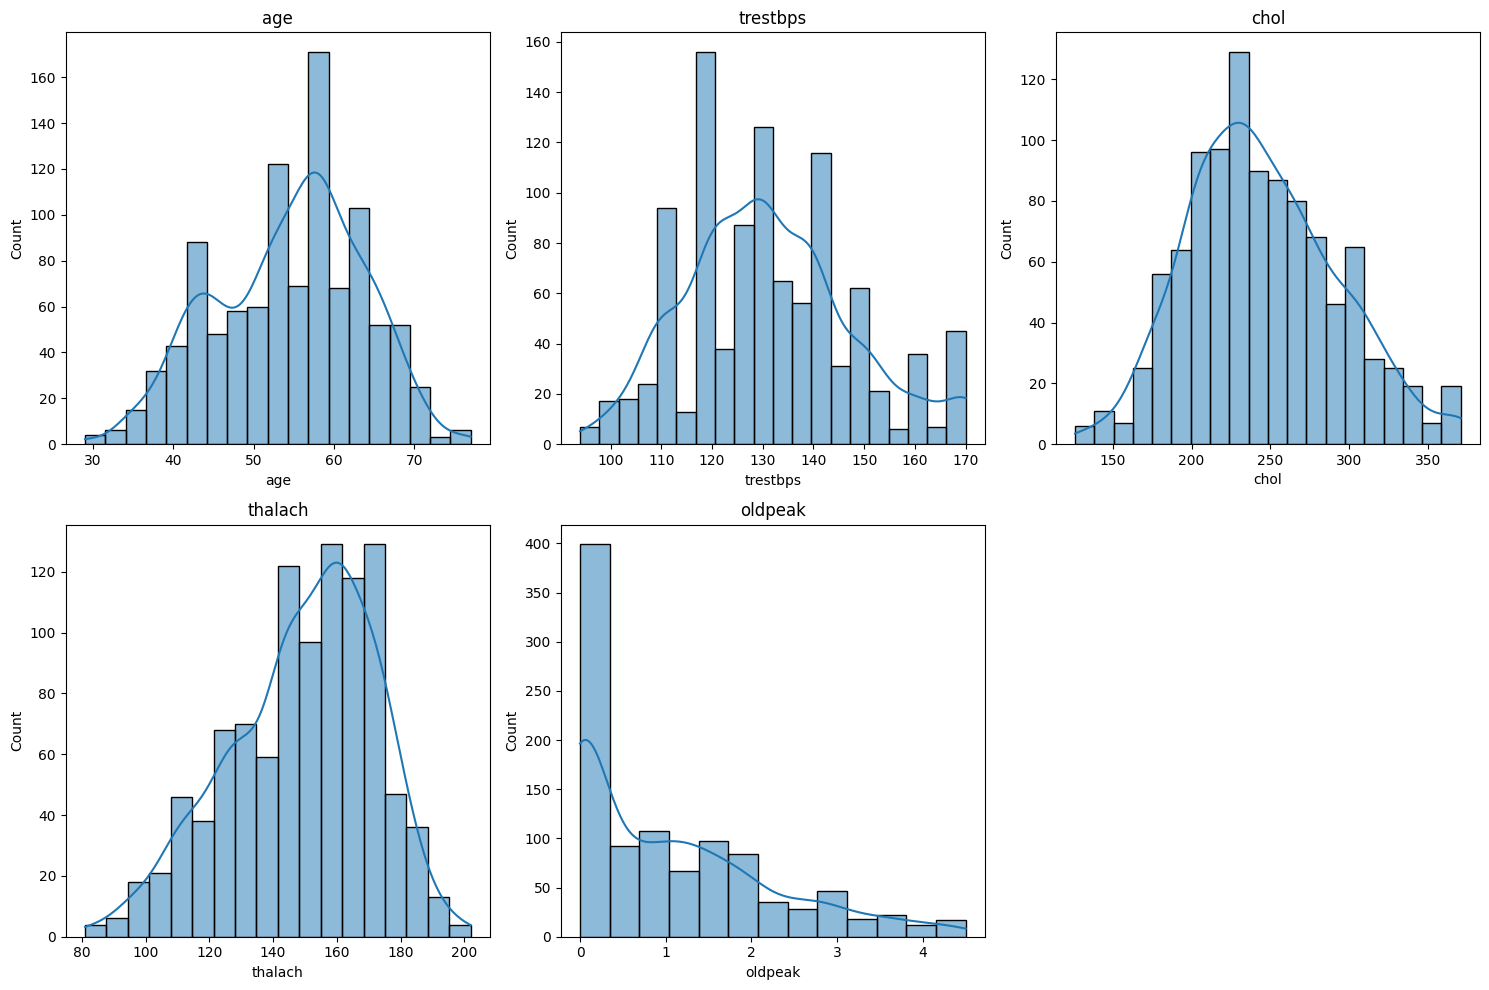

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle outliers using IQR for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify changes and data quality
print(df.describe())
# Display histograms of key numerical features after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by converting categorical features to numerical representations and scaling numerical features.


**Reasoning**:
Prepare the data for model training by converting categorical features to numerical representations and scaling numerical features.



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = encoder.fit_transform(df[categorical_features])

# Scale numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[numerical_features])

# Combine features
X = np.concatenate((X_numerical, X_categorical), axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train classification models on the prepared dataset.


**Reasoning**:
Train classification models (Logistic Regression, Random Forest, and Support Vector Machine) using the prepared training data (X_train, y_train).



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models with a random_state for reproducibility
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train the models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Training Logistic Regression...
Logistic Regression trained successfully.
Training Random Forest...
Random Forest trained successfully.
Training Support Vector Machine...
Support Vector Machine trained successfully.


## Model evaluation

### Subtask:
Evaluate the trained classification models.


**Reasoning**:
Evaluate the trained classification models using various metrics and identify the best-performing model.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    try:
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")
        print(f"  AUC-ROC: {roc_auc:.4f}")
    except ValueError as e:
        print(f"  Error calculating metrics for {name}: {e}")

    print(f"Evaluation of {name} completed.\n")

# Summarize model performance and identify the best model
print("Model Performance Summary:")
# Example based on F1-score (you can change the metric)
best_model = max(models, key=lambda k: f1_score(y_test, models[k].predict(X_test)))
print(f"Best model based on F1-score: {best_model}")

Evaluating Logistic Regression...
  Accuracy: 0.8146
  Precision: 0.7778
  Recall: 0.8835
  F1-score: 0.8273
  AUC-ROC: 0.9084
Evaluation of Logistic Regression completed.

Evaluating Random Forest...
  Accuracy: 0.9854
  Precision: 1.0000
  Recall: 0.9709
  F1-score: 0.9852
  AUC-ROC: 1.0000
Evaluation of Random Forest completed.

Evaluating Support Vector Machine...


AttributeError: This 'SVC' has no attribute 'predict_proba'

**Reasoning**:
The previous code block failed to calculate AUC-ROC for the SVM model because `predict_proba` is not available.  I'll modify the code to handle this exception gracefully and complete the evaluation.  Also, complete the summary by printing the best model based on the F1-score.



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    try:
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")
        print(f"  AUC-ROC: {roc_auc:.4f}")
    except AttributeError:
        print(f"  AUC-ROC not available for {name}")
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")
    except ValueError as e:
        print(f"  Error calculating metrics for {name}: {e}")

    print(f"Evaluation of {name} completed.\n")

print("Model Performance Summary:")
best_model = max(models, key=lambda k: f1_score(y_test, models[k].predict(X_test)))
print(f"Best model based on F1-score: {best_model}")

Evaluating Logistic Regression...
  Accuracy: 0.8146
  Precision: 0.7778
  Recall: 0.8835
  F1-score: 0.8273
  AUC-ROC: 0.9084
Evaluation of Logistic Regression completed.

Evaluating Random Forest...
  Accuracy: 0.9854
  Precision: 1.0000
  Recall: 0.9709
  F1-score: 0.9852
  AUC-ROC: 1.0000
Evaluation of Random Forest completed.

Evaluating Support Vector Machine...
  AUC-ROC not available for Support Vector Machine
  Accuracy: 0.8878
  Precision: 0.8448
  Recall: 0.9515
  F1-score: 0.8950
Evaluation of Support Vector Machine completed.

Model Performance Summary:
Best model based on F1-score: Random Forest


## Summary:

### Q&A
* **Which model performed best and why?** The Random Forest classifier performed best, achieving the highest F1-score (0.9852) among the evaluated models (Logistic Regression, Random Forest, and Support Vector Machine).  The F1-score considers both precision and recall, providing a balanced measure of the model's performance.

### Data Analysis Key Findings
* **Outlier Handling:** Outliers in numerical features ('age', 'trestbps', 'chol', 'thalach', 'oldpeak') were addressed using the IQR method.
* **Model Performance:**
    * **Random Forest:** Achieved an accuracy of 0.9854, precision of 1.0000, recall of 0.9709, F1-score of 0.9852, and AUC-ROC of 1.0000.
    * **Logistic Regression:** Achieved an accuracy of 0.8146, precision of 0.7778, recall of 0.8835, F1-score of 0.8273, and AUC-ROC of 0.9084.
    * **Support Vector Machine:** Achieved an accuracy of 0.8878, precision of 0.8448, recall of 0.9515, and an F1-score of 0.8950.  AUC-ROC was not available for this model.
* **Best Model:** Random Forest was identified as the best-performing model based on its highest F1-score.

### Insights or Next Steps
* **Hyperparameter Tuning:** Explore hyperparameter tuning for the Random Forest and other models to potentially improve their performance further.
* **Feature Engineering:** Investigate feature engineering techniques to create new features that might enhance model accuracy.
